<a href="https://colab.research.google.com/github/RegaipKURT/Advanced_AI_with_PYTHON/blob/master/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auto Encoders

Auto Encoder modeli alınan bir girdiyi gizli katmanlarda daha az nöron kullanarak sıkıştırarak veriyi en iyi temsil eden özelliklerin çıkarılmasına yardımcı olur. Daha sonra bu özelliklerden baştaki çıkyıtı en iyi verecek output layer ağırlıklarını oluşturmaya çalışır. Yani girdi olarak bir resim dosyası verdiğimizde, bu resmi en iyi temsil eden özellikleri çıkarır ve daha sonra bu özelliklerden aynı resmi oluşturmaya çalışır. Sadece resim değil, sinyal işlemede gürültü(noise) kaldırma işlemlerinde de kullanılabilir. Veya bir zaman serisinde verinin genel eğilimlerini bulur ve verideki gürültüyü ortadan kaldırabilir. Bunun gibi birçok kullanım alanı olsa da daha iyi anlamak adına bu yapının görsel haline bakmak daha iyi anlamamıza yardımcı olabilir.
![alt text](https://static.packt-cdn.com/products/9781787121089/graphics/B12043_04_06.png)

Resmin alındığı kaynak: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787121089/4/ch04lvl1sec51/setting-up-stacked-autoencoders

**Kütüphanelerin Yüklenmesi**

In [0]:
from keras.models import Input, Model
from keras.layers import Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import json
import warnings
warnings.filterwarnings("ignore")

**Verisetinin Yüklenmesi**

In [0]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

**Verinin Tipini Dönüştüme ve Scale İşlemi**

In [0]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

**Verinin Yeniden Boyutlandırılması**

In [0]:
x_train = x_train.reshape((len(x_train), x_train.shape[1:][0]*x_train.shape[1:][1]))

In [0]:
x_test = x_test.reshape((len(x_test), x_test.shape[1:][0]*x_test.shape[1:][1]))

In [20]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


**Verisetini Örnek Olarak Görselleştirme**

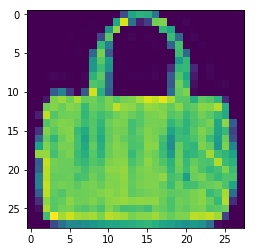

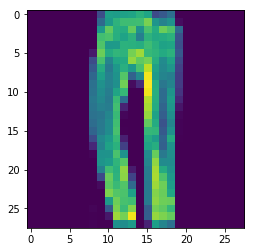

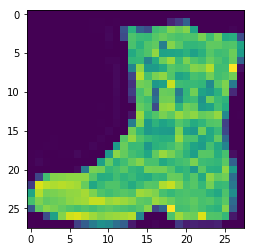

In [21]:
plt.imshow(x_train[4000].reshape(28,28))
plt.show()
plt.imshow(x_train[1500].reshape(28,28))
plt.show()
plt.imshow(x_train[150].reshape(28,28))
plt.show()

**AutoEncoder Modeli OLuşturma Aşaması**

Encoder ve Decoder layerlarının oluşturulması

In [23]:
input_img = Input(shape=(784,))
encoded = Dense(32, activation="relu")(input_img)
encoded = Dense(16, activation="relu")(encoded)

In [0]:
decoded = Dense(32, activation="relu")(encoded)
output_img = Dense(784, activation="sigmoid")(decoded)

**AutoEncoder Modeli Oluşturma**

İnput kısmından output kısmına kadar oluşturduğumuz layerları bir model içine depolayıp AutoEncoder kurmuş olacağız.

In [0]:
autoencoder = Model(input_img, output_img)

**Model Compile ve Train Aşamaları**

In [26]:
autoencoder.compile(optimizer="rmsprop", loss="binary_crossentropy")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = autoencoder.fit(x_train, x_train, 
                          epochs=200, 
                          batch_size=256, 
                          shuffle=True,
                          validation_data=(x_train, x_train))

**Sonuçların Görselleştirilmesi**

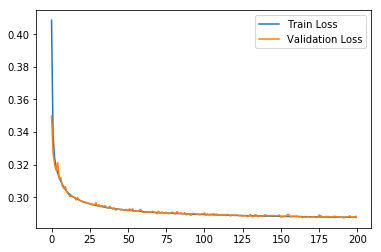

In [32]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

**Sonuçta ortaya çıkan resimlere test setinden tahmin yapıp bakalım**

In [0]:
x_test_pred = autoencoder.predict(x_test)

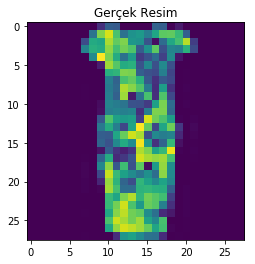

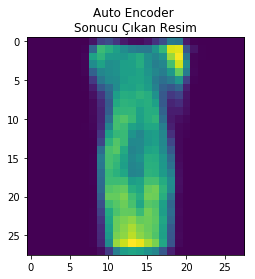

In [31]:
plt.imshow(x_test[100].reshape(28,28))
plt.title("Gerçek Resim")
plt.show()
plt.imshow(x_test_pred[100].reshape(28,28))
plt.title("Auto Encoder \nSonucu Çıkan Resim")
plt.show()

Sonuç olarak modelimizin hiç görmediği resimler üzerinde de kabul edilebilir sonuçlar verdiğini resimleri görselleştirerek anlamış olduk. Tabi burada yazılanlar eğitim amaçlı ve optimize edilmemiş bir modelden ortaya çıktı. Daha iyi sonuçlar elde edilmesi mümkün.

**Daha fazla resim ile görselleştirelim**

Kaynak: https://blog.keras.io/building-autoencoders-in-keras.html

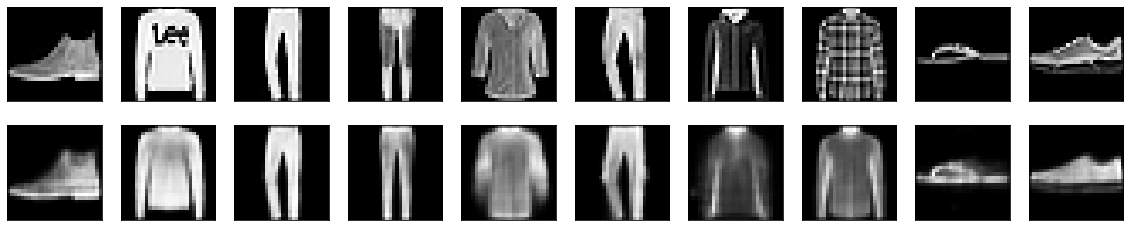

In [33]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_pred[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()